In [4]:
import dimers_util
from dimers_util import *
import dimers_analysis
from dimers_analysis import *
import dimers_sim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload 
import pickle
from scipy.optimize import curve_fit
import os
import time
reload(dimers_util)
reload(dimers_sim)
reload(dimers_analysis)

<module 'dimers_analysis' from '/space/ge83qez/DymerKrylov/dimers_analysis.py'>

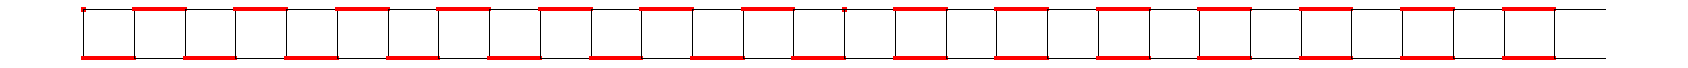

In [261]:
dimers_util.plot_conf(dimers_util.get_initial_config_point(30, 15))

In [268]:
exps = [ 'cluster2468_ic_experiment_L2200_t1500_d[60]____2023_01_27__13_46.pickle',
         'cluster1204_ic_experiment_L1900_t1500_d[60]____2023_01_27__08_13.pickle',
         'cluster9116_ic_experiment_L1700_t1500_d[60]____2023_01_27__00_43.pickle',
         'cluster3671_ic_experiment_L1500_t1500_d[60]____2023_01_27__01_54.pickle',
         'cluster3795_ic_experiment_L1300_t1500_d[60]____2023_01_26__22_27.pickle',
         'd_ic_experiment_L300_t1500_d[60]____2023_01_26__15_06.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_initial_conditions/"+path, 'rb') as f:
        exp_files.append(pickle.load(f))
file_name= "Long_time_experiment1"
experiment = dimers_sim.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

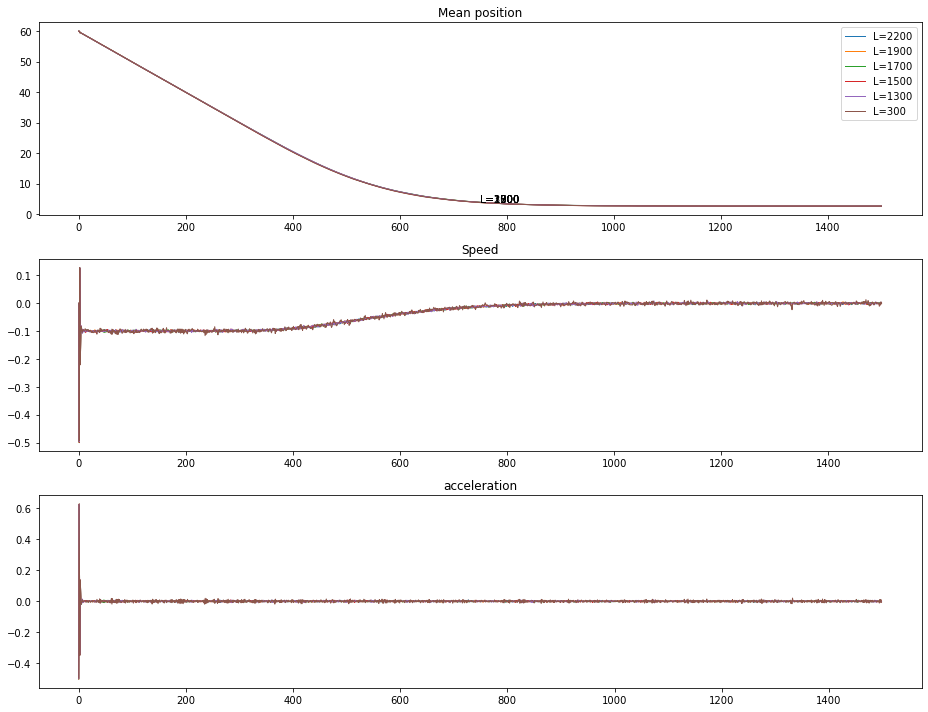

In [269]:
dimers_analysis.plot_analyses(experiment.results, label='L')

In [250]:
def plot_average_dynamics(experiment, label, win=10, ti=0):
    x_t = {}
    v_t = {}
    a_t = {}
    for ana in experiment.results:
        t = ana.times
        x = np.array([np.mean(ana.analysis['Mean'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        x_t[getattr(ana, label)] = x
        #v = np.array([np.mean(ana.analysis['speed'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        v = x[1:] - x[:-1]
        v_t[getattr(ana, label)] = v
        #a = np.array([np.mean(ana.analysis['acc'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        a_t[getattr(ana, label)] = v[1:] - v[:-1]
        
    plt.figure(1, figsize=(10,8))
    plt.subplot(211)
    for k in v_t:
        plt.plot(v_t[k], label=str(k))
    plt.title('speed')
    plt.legend()
    #plt.xticks(np.arange(ti,tf, 50))
    
    plt.subplot(212)
    for k in a_t:
        plt.plot(a_t[k], label=str(k))
    plt.title("acceleration")
    plt.legend()
    #plt.xticks(np.arange(ti,tf, 50))
    
    plt.show()
    
    return v_t, a_t

In [64]:
((experiment.results[0].times*times)//10).astype(np.int32)

array([  6000,  18000,  30000,  42000,  54000,  66000,  78000,  90000,
       102000, 114000])

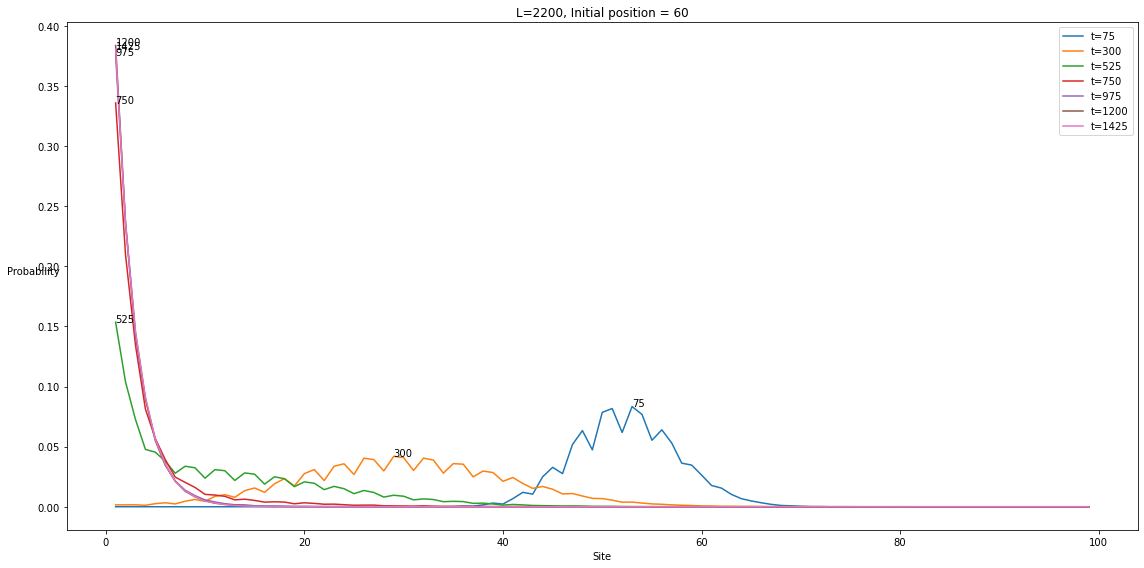

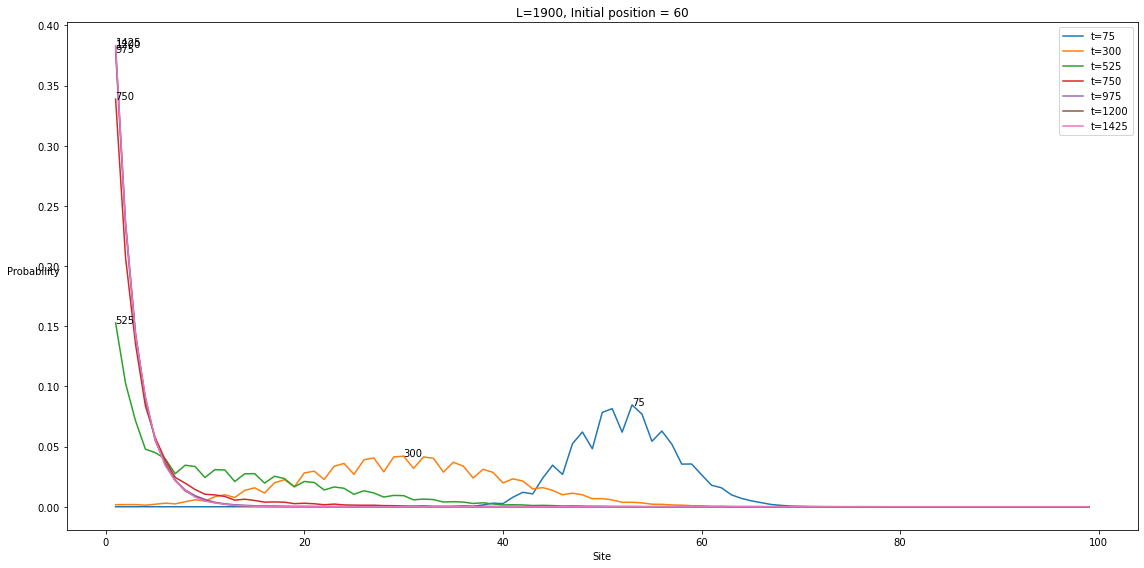

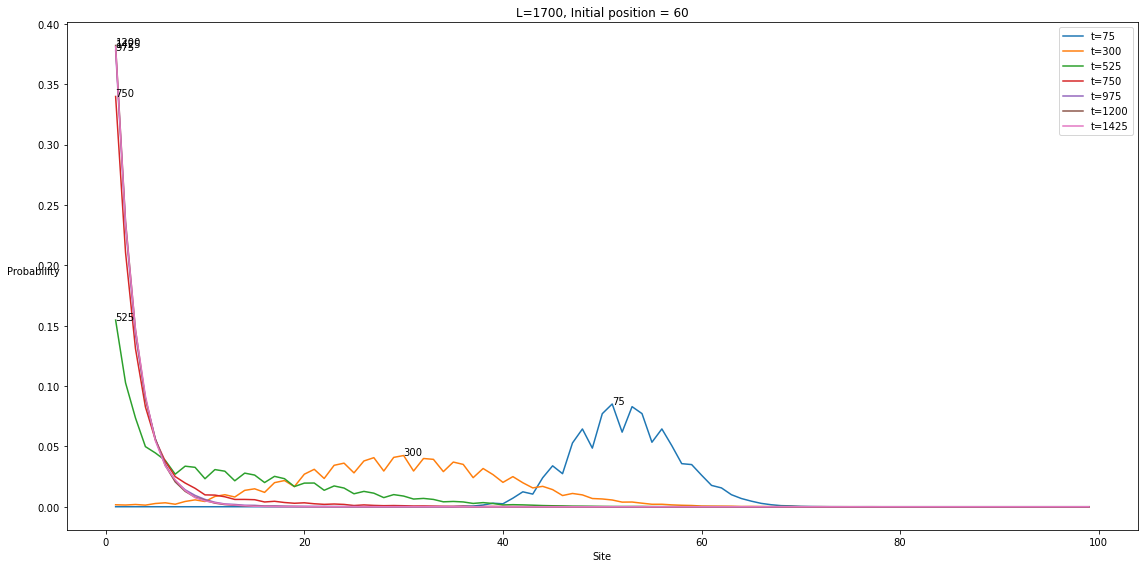

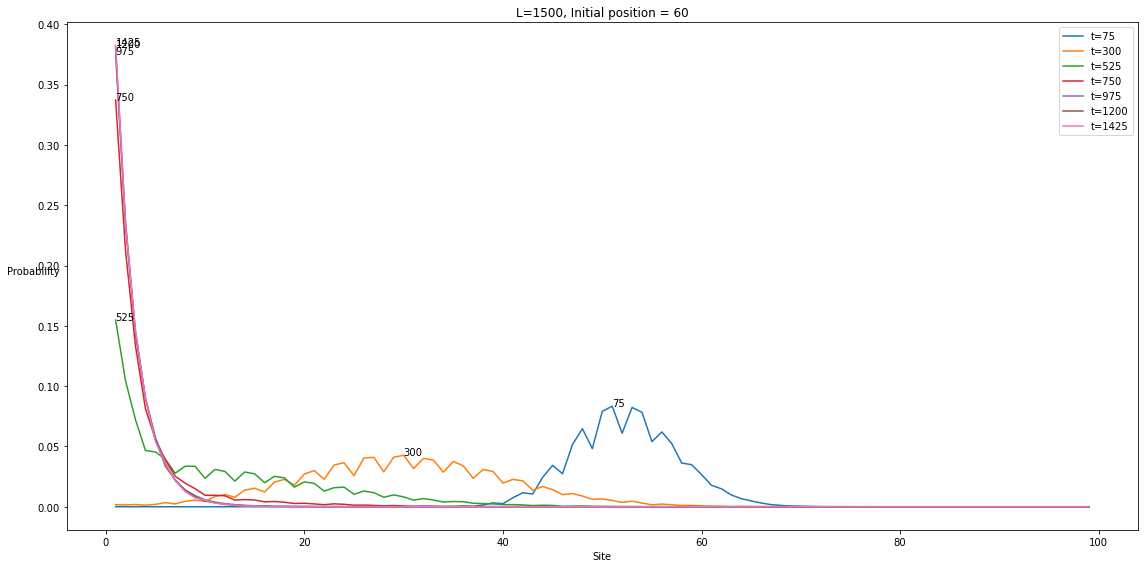

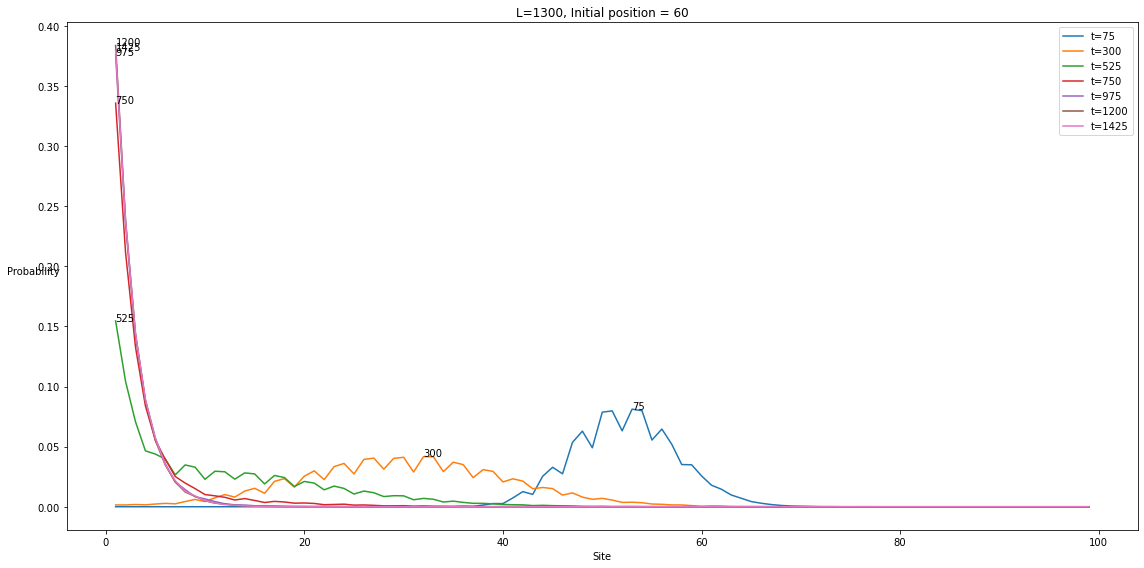

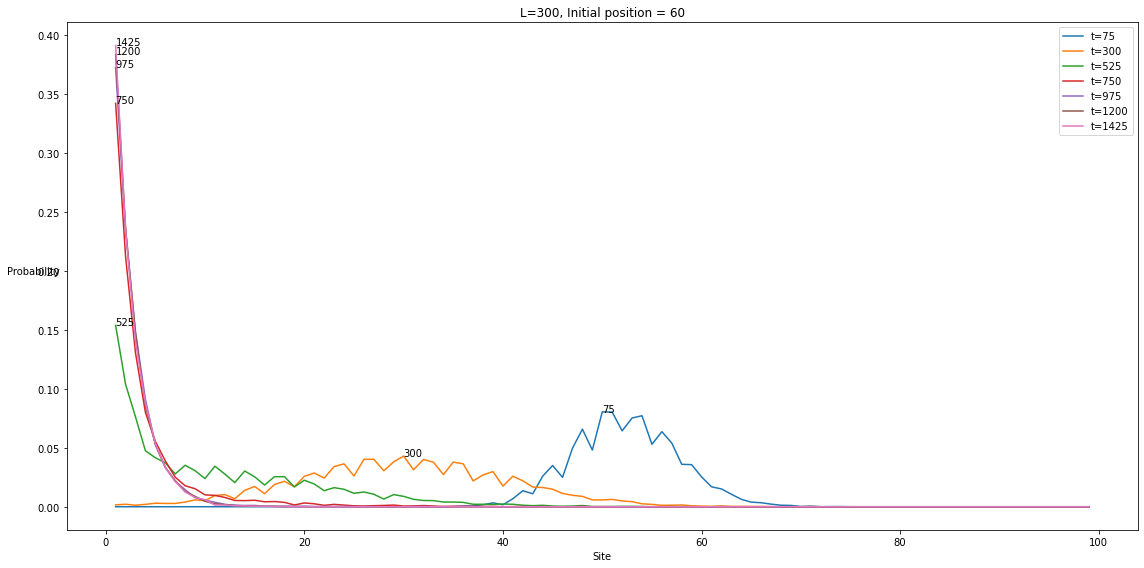

In [64]:
times = np.arange(0.5, 10, step=1.5)
for ana in experiment.results:
    ana_times = (ana.times*times//10).astype(np.int32)
    dimers_analysis.plot_dist(ana, ana_times, title="L={}".format(ana.analysis['L']), site_max=100)

In [14]:
def plot_fit(ana, times,f, label, p0=None):
    ana_times = (ana.times*times).astype(np.int32)
    plt.figure(1, figsize=(8,16))
    for i, t in enumerate(zip(times, ana_times)):
        plt.subplot(100*len(times) + 10 +i+1)
        popt_t, pcov_t, x_max, x_min = dimers_analysis.dist_fit(ana, f, t[1], p0)
        xrange = np.arange(x_min, x_max)
        y = ana.rho[t[1],x_min:x_max]
        plt.plot(xrange, y, label="Simulation L={}".format(str(ana.L)))
        plt.plot(xrange, f(xrange, *popt_t),label="{} L={}".format(label, str(ana.L)))
        plt.title("t={}".format(t[0]))
        plt.legend()
    plt.tight_layout()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (99,) and (39,)

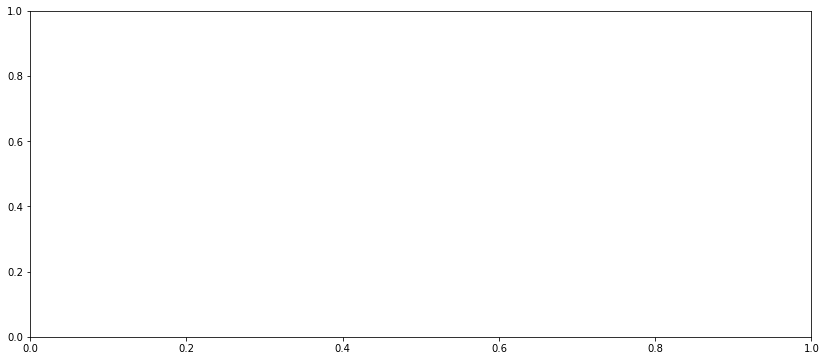

In [13]:
times = np.array([0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.95])

ana = experiment.results[0]    
dimers_analysis.plot_dist(ana, times, title="L={}".format(ana.analysis['L']), site_max=100)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

In [271]:
exps = ['cluster5146_ic_experiment_L1300_t13000_d[480]____2023_02_01__13_44.pickle',
        'cluster1064_ic_experiment_L1300_t5400_d[240]____2023_01_31__23_46.pickle',
        'cluster3702_ic_experiment_L1300_t3500_d[120]____2023_01_31__17_42.pickle',
        'cluster3795_ic_experiment_L1300_t1500_d[60]____2023_01_26__22_27.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_initial_conditions/"+path, 'rb') as f:
        exp_files.append(pickle.load(f))
file_name= "Long_time_experiment1"
experiment_d = dimers_analysis.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

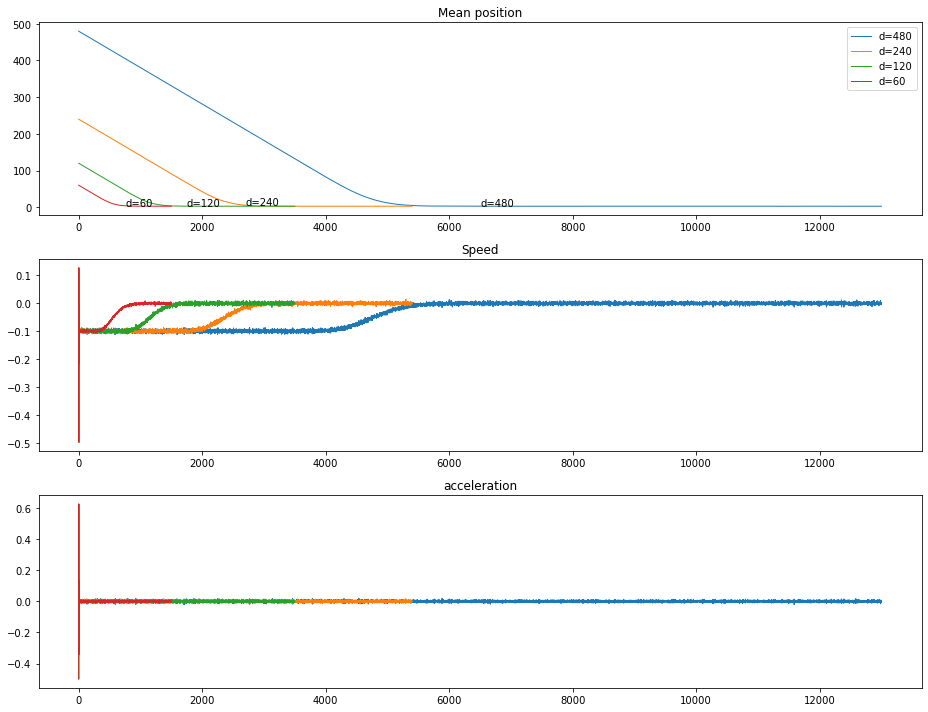

In [270]:
dimers_analysis.plot_analyses(experiment_d.results, label='d')

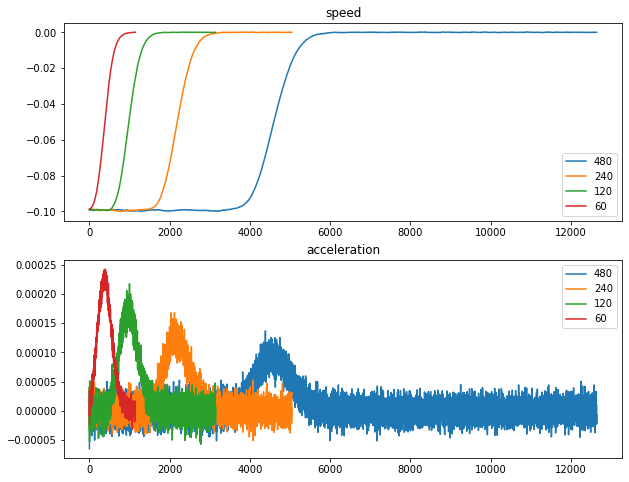

In [253]:
v_t, a_t = plot_average_dynamics(experiment_d, label="d", win=350, ti=5)

In [18]:
p = [0.0001, 0.0003, 0.0006, 0.001,  0.01, 0.2, 0.7]
exps = ['cluster8440_ic_experiment_L500_t3000_d[60]_p0.0001____2023_02_07__15_56.pickle',
        'cluster3508_ic_experiment_L500_t3000_d[60]_p0.0003____2023_02_07__16_49.pickle',
        'cluster3519_ic_experiment_L500_t3000_d[60]_p0.0006____2023_02_07__16_47.pickle',
        'cluster5965_ic_experiment_L500_t3000_d[60]_p0.001____2023_02_07__16_50.pickle',
        'cluster9781_ic_experiment_L500_t3000_d[60]_p0.01____2023_02_07__19_11.pickle',
        'cluster2495_ic_experiment_L500_t3000_d[60]_p0.2____2023_02_07__20_03.pickle',
        'cluster9397_ic_experiment_L500_t3000_d[60]_p0.7____2023_02_07__21_06.pickle']
exp_files = []
for _p, path in zip(p, exps):
    with open("analyses/varying_p/"+path, 'rb') as f:
        a = pickle.load(f)
        a.results[0].analysis['p'] = _p
        exp_files.append(a)
file_name= "varying_p_L500_d60"
experiment = dimers_analysis.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

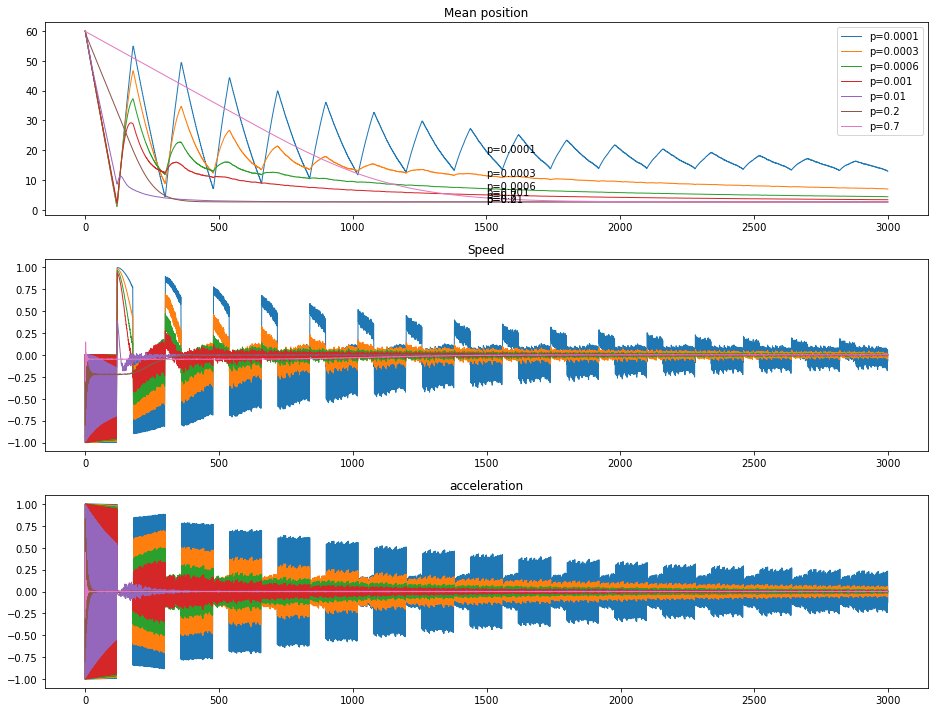

In [19]:
dimers_analysis.plot_analyses(experiment.results, label='p')

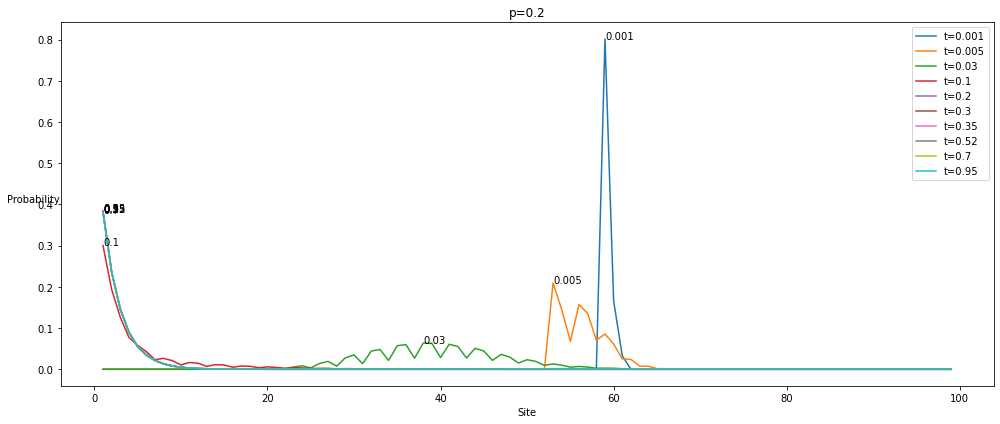

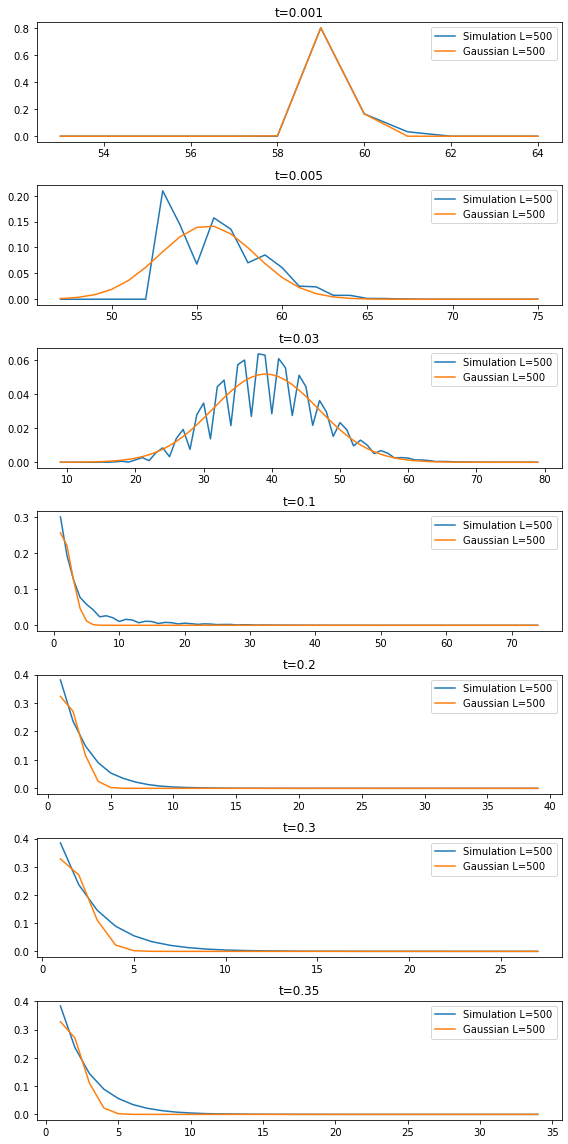

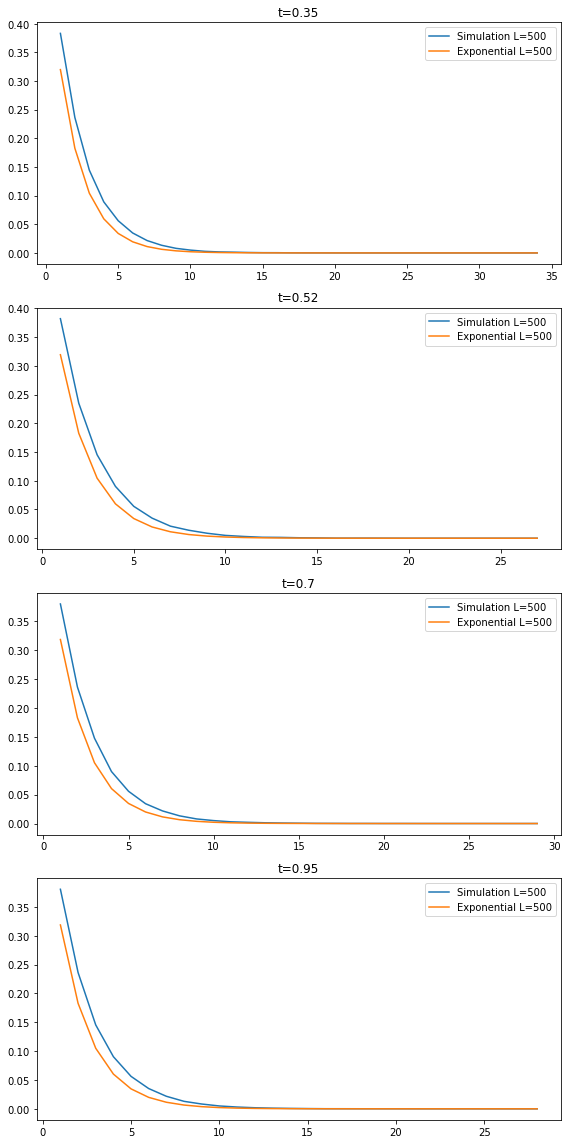

In [23]:
times = np.array([0.001, 0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.70, 0.95])

ana = experiment.results[5]    
dimers_analysis.plot_dist(ana, times, title="p={}".format(ana.analysis['p']), site_max=100)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

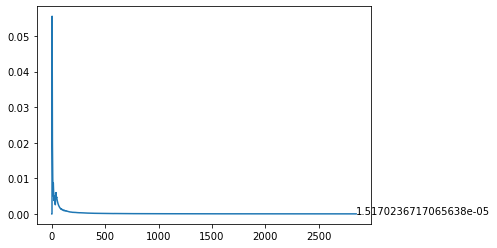

In [7]:
dimers_util.check_detailed_balance(35, 3000, 18, interval=150)

In [24]:
p = [0.0001, 0.0003, 0.0006, 0.001,  0.01, 0.2, 0.7]
exps = ['d_ic_experiment_L40_t600_d[30]_p0.0001____2023_02_15__12_43.pickle']
exp_files = []
for _p, path in zip(p, exps):
    with open("analyses/varying_p/"+path, 'rb') as f:
        a = pickle.load(f)
        a.results[0].analysis['p'] = _p
        exp_files.append(a)
file_name= "varying_p_test"
experiment = dimers_analysis.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

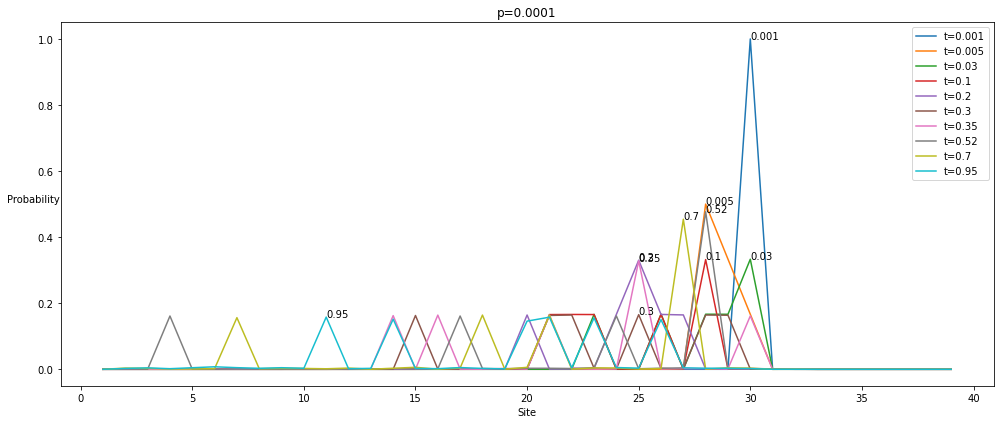

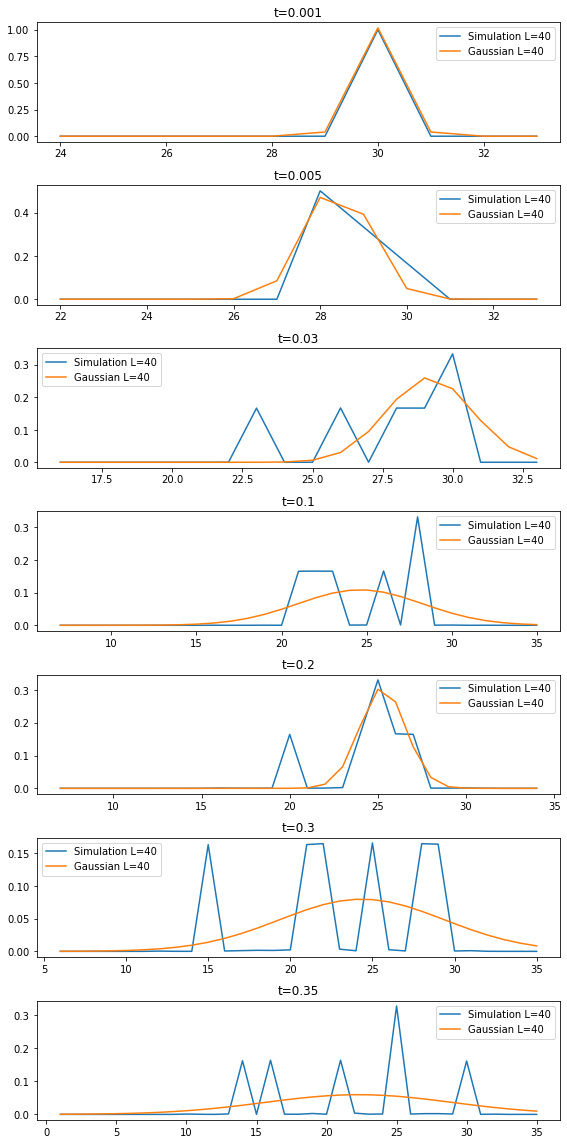

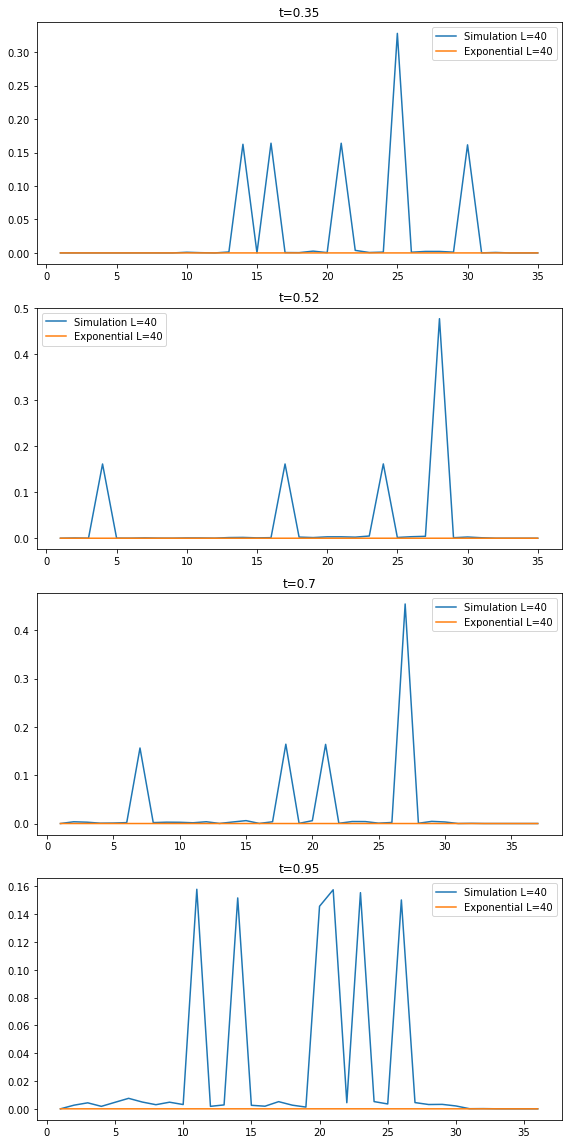

In [29]:
times = np.array([0.001, 0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.70, 0.95])

ana = experiment.results[0]    
dimers_analysis.plot_dist(ana, times, title="p={}".format(ana.analysis['p']), site_max=40)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

In [43]:
exps = ['d_ic_experiment_L50_t600_d[30]____2023_02_21__13_47.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_initial_conditions/"+path, 'rb') as f:
        experiment = pickle.load(f)

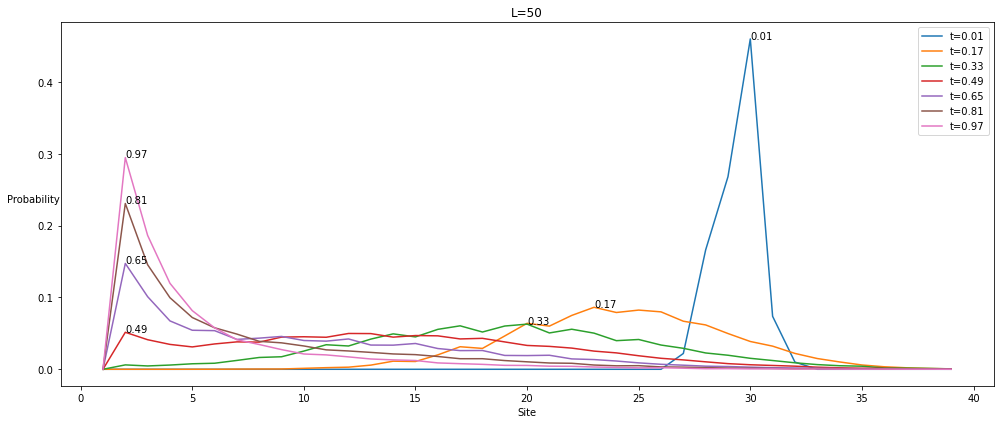

In [44]:
times = np.arange(0.01, 1, step=0.16)
ana = experiment.results[0]

ana_times = (ana.times*times//10).astype(np.int32)
dimers_analysis.plot_dist(ana, times, title="L={}".format(ana.analysis['L']), site_max=40)